## Terminal Script
* pip install kaggle

* mkdir C:\Users\pascal\.kaggle
* move "C:\Users\pascal\Desktop\New Projects\Disease predict\kaggle.json" "C:\Users\pascal\.kaggle\kaggle.json"
* kaggle datasets list



In [1]:
## Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
## Importing the dependencies


import os
import json
import random
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
     

### Import Data

In [3]:
try:
    kaggle_credentials = json.load(open("kaggle.json"))
    os.environ['KAGGLE_USERNAME'] = kaggle_credentials["username"]
    os.environ['KAGGLE_KEY'] = kaggle_credentials["key"]
except FileNotFoundError:
    print("kaggle.json file not found. Please place it in the directory.")
except KeyError:
    print("Error: Invalid JSON format in kaggle.json.")


In [4]:
# #Load Kaggle API credentials from the kaggle.json file and set them as environment variables.
# This allows the script to authenticate with the Kaggle API automatically.

if not os.path.exists('plantvillage dataset'): 
    if not os.path.exists('plantvillage-dataset.zip'):
        # Download the dataset if the ZIP file doesn't exist
        os.system('kaggle datasets download -d abdallahalidev/plantvillage-dataset')
    
    # Extract the dataset if the directory doesn't exist
    with ZipFile('plantvillage-dataset.zip', 'r') as zip_ref:
        zip_ref.extractall('plantvillage dataset')


### Data Overview

In [5]:


# Dataset base directory
base_dir = 'plantvillage dataset'

# List of subdirectories to explore
sub_dirs = ['segmented', 'color', 'grayscale']

# Check if the base directory exists
if os.path.exists(base_dir):
    # List files in the base directory
    print(f"Contents of '{base_dir}':")
    print(os.listdir(base_dir))
    print()

    # Explore each subdirectory in 'sub_dirs'
    for sub_dir in sub_dirs:
        dir_path = os.path.join(base_dir, sub_dir)
        if os.path.exists(dir_path):
            # Get number of classes and list the first 5
            class_list = os.listdir(dir_path)
            print(f"Number of classes in '{sub_dir}': {len(class_list)}")
            print(f"First 5 classes in '{sub_dir}': {class_list[:5]}\n")
        else:
            print(f"Directory '{dir_path}' does not exist.\n")

    # Now filter to focus on the 'color' dataset
    color_dir = os.path.join(base_dir, 'color')
    grape_healthy_dir = os.path.join(color_dir, 'Grape___healthy')

    # Check if the 'Grape___healthy' directory exists
    if os.path.exists(grape_healthy_dir):
        # Get the number of images and list the first 5
        grape_images = os.listdir(grape_healthy_dir)
        print(f"Number of images in 'Grape___healthy': {len(grape_images)}")
        print(f"First 5 images in 'Grape___healthy': {grape_images[:5]}\n")
    else:
        print(f"Directory '{grape_healthy_dir}' does not exist.\n")
else:
    print(f"Base directory '{base_dir}' does not exist.")


Contents of 'plantvillage dataset':
['color', 'grayscale', 'segmented', 'test_images']

Number of classes in 'segmented': 38
First 5 classes in 'segmented': ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']

Number of classes in 'color': 38
First 5 classes in 'color': ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']

Number of classes in 'grayscale': 38
First 5 classes in 'grayscale': ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']

Number of images in 'Grape___healthy': 423
First 5 images in 'Grape___healthy': ['00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG', '0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG', '0294ca65-4c29-44be-af28-501df9f715e8___Mt.N.V_HL 6176.JPG', '02f95acb-5d92-4f2a-b7ec-3af8709ee7c9___Mt.N.V_HL 9078.JPG', '03027791-26bb-4c46-960e-8df76e27042c___Mt.

### The Focus ( Colored Images Data)

Number of images in 'color': 38
First 5 classes in 'color': ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


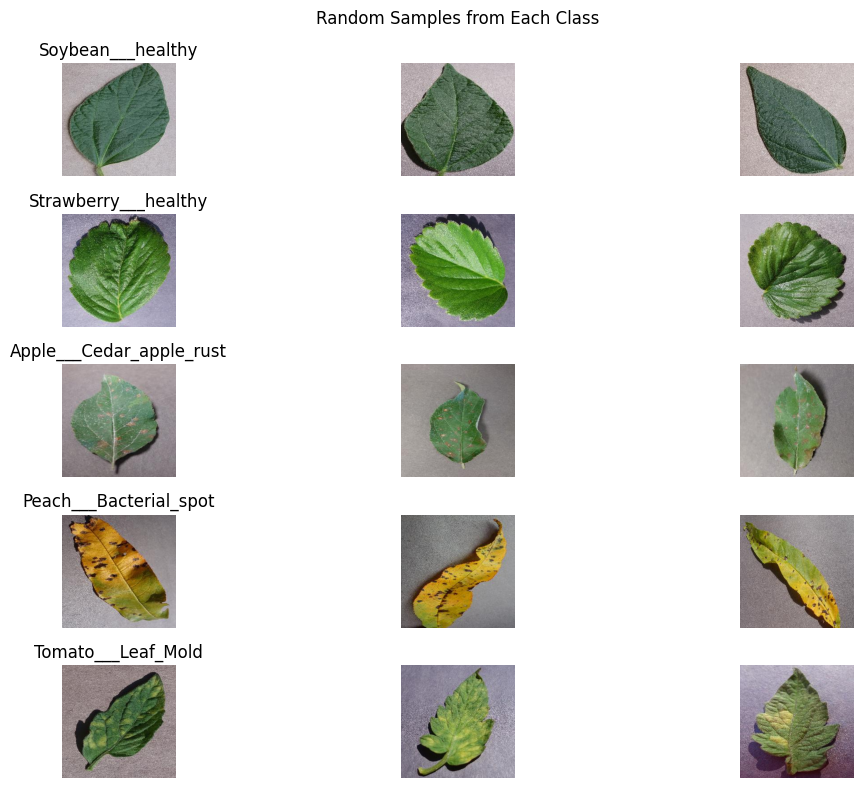

In [6]:

# Dataset directory path for colored images
color_dir = 'plantvillage dataset/color'

# Check if the 'color' directory exists
if os.path.exists(color_dir):
    print(f"Number of images in 'color': {len(os.listdir(color_dir))}")
    
    # Print the first 5 classes in the color directory
    class_dirs = [d for d in os.listdir(color_dir) if os.path.isdir(os.path.join(color_dir, d))]
    print(f"First 5 classes in 'color': {class_dirs[:5]}")

    # Visualize random samples from the colored dataset
    def visualize_random_samples(color_dir, classes=5, samples_per_class=3):
        # Get a list of all class directories
        class_dirs = [d for d in os.listdir(color_dir) if os.path.isdir(os.path.join(color_dir, d))]

        # If fewer classes are available than requested, adjust 'classes' accordingly
        if len(class_dirs) < classes:
            classes = len(class_dirs)
            print(f"Reduced number of classes to {classes} due to available directories.")

        # Randomly select 'classes' number of classes
        selected_classes = random.sample(class_dirs, classes)

        # Set up the plot
        fig, axes = plt.subplots(nrows=classes, ncols=samples_per_class, figsize=(12, 8))
        fig.suptitle('Random Samples from Each Class')

        for i, class_name in enumerate(selected_classes):
            # Get image files in the class directory
            class_path = os.path.join(color_dir, class_name)
            image_files = os.listdir(class_path)

            # Randomly select 'samples_per_class' number of images from the class
            selected_images = random.sample(image_files, samples_per_class)

            for j, image_name in enumerate(selected_images):
                # Read and display the image
                img_path = os.path.join(class_path, image_name)
                img = mpimg.imread(img_path)
                axes[i, j].imshow(img)
                axes[i, j].axis('off')
                if j == 0:
                    axes[i, j].set_title(class_name)  # Display class name for the first image

        plt.tight_layout()
        plt.show()

    # Call the function to visualize random samples from the 'color' dataset
    visualize_random_samples(color_dir)

else:
    print(f"Directory '{color_dir}' does not exist.")


### Data Processing & Train Test Split

In [7]:
# Simplified Image Parameters
img_size = 128  # Reduced image size for faster processing
batch_size = 16  # Smaller batch size for less memory usage

# Simplified Image Data Generators with lighter augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # Reduced rotation
    width_shift_range=0.1,  # Reduced shifts
    height_shift_range=0.1,
    zoom_range=0.1,  # Lighter zoom
    horizontal_flip=True,  # Retain flipping
    validation_split=0.2  # Keep 20% of data for validation
)

# Train Generator with Augmentation
train_generator = data_gen.flow_from_directory(
    color_dir,
    target_size=(img_size, img_size),  # Smaller image size for faster training
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

# Validation Generator (No Augmentation but Still Rescaled)
validation_generator = data_gen.flow_from_directory(
    color_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)


Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


## Convolutional Neural Network Model Refined

In [8]:

from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Enhanced Model Definition
model = models.Sequential()

# First Convolutional Block
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.BatchNormalization())  # Normalizing activations to improve training
model.add(layers.MaxPooling2D(2, 2))

# Second Convolutional Block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())  # Batch normalization to stabilize learning
model.add(layers.MaxPooling2D(2, 2))

# Third Convolutional Block
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

# Fourth Convolutional Block (optional for deeper learning)
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

# Flattening the 3D feature maps to 1D vectors
model.add(layers.Flatten())

# Fully Connected Dense Layer with Dropout for Regularization
model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dropout(0.5))  # Dropout to prevent overfitting

# Output Layer: Number of units = number of classes, activation function = softmax for multi-class classification
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

# Displaying the model summary
model.summary()


c:\Users\pascal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,759,654 (10.53 MB)

 Trainable params: 2,758,694 (10.52 MB)

 Non-trainable params: 960 (3.75 KB)

### Model Compilation

In [9]:


# Compile the model with Adam optimizer and categorical crossentropy loss
# - Adam: An adaptive learning rate optimization algorithm
# - Categorical Crossentropy: Suitable for multi-class classification problems..
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Model Training


In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks for early stopping and saving the best model
#callbacks = [
    #EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),  # Stop early if validation loss doesn't improve
    #ModelCheckpoint('best_model.keras', save_best_only=True)  # Save the best model with .keras extension
#]

# Training the model
history = model.fit(
    train_generator,  # Training data
    steps_per_epoch=train_generator.samples // batch_size,  # Number of batches of training data to run per epoch
    epochs=10,  # Adjust based on data size and performance
    validation_data=validation_generator,  # Validation data
    validation_steps=validation_generator.samples // batch_size,  # Number of validation steps
    callbacks=None  # Include the callbacks
)


Epoch 1/10


c:\Users\pascal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2716/2716 ━━━━━━━━━━━━━━━━━━━━ 883s 324ms/step - accuracy: 0.6388 - loss: 1.3160 - val_accuracy: 0.8419 - val_loss: 0.5195
Epoch 2/10
2716/2716 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 5.5536e-04
Epoch 3/10


c:\Users\pascal\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


2716/2716 ━━━━━━━━━━━━━━━━━━━━ 931s 342ms/step - accuracy: 0.8468 - loss: 0.4833 - val_accuracy: 0.8830 - val_loss: 0.3848
Epoch 4/10
2716/2716 ━━━━━━━━━━━━━━━━━━━━ 0s 12us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 1.1921e-06
Epoch 5/10
2716/2716 ━━━━━━━━━━━━━━━━━━━━ 820s 302ms/step - accuracy: 0.8974 - loss: 0.3243 - val_accuracy: 0.9076 - val_loss: 0.2951
Epoch 6/10
2716/2716 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2356
Epoch 7/10
2716/2716 ━━━━━━━━━━━━━━━━━━━━ 806s 297ms/step - accuracy: 0.9205 - loss: 0.2587 - val_accuracy: 0.9109 - val_loss: 0.2863
Epoch 8/10
2716/2716 ━━━━━━━━━━━━━━━━━━━━ 0s 9us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 7.0450e-05
Epoch 9/10
2716/2716 ━━━━━━━━━━━━━━━━━━━━ 805s 296ms/step - accuracy: 0.9363 - loss: 0.1947 - val_accuracy: 0.9306 - val_loss: 0.2319
Epoch 10/10
2716/2716 ━━━━━━━━━━━━━━━━━━━━ 0s 9us/s

## Model Evaluation

In [11]:
# Model Evaluation
print("Evaluating model...")
# Evaluate the model on the validation data
# steps = number of batches of samples processed in one evaluation run
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)

# Print the validation accuracy
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")



Evaluating model...
678/678 ━━━━━━━━━━━━━━━━━━━━ 67s 99ms/step - accuracy: 0.9307 - loss: 0.2184
Validation Accuracy: 92.80%


## Acuracy and Plot

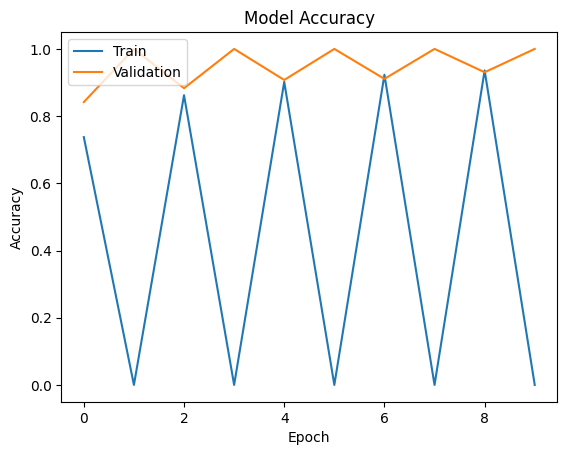

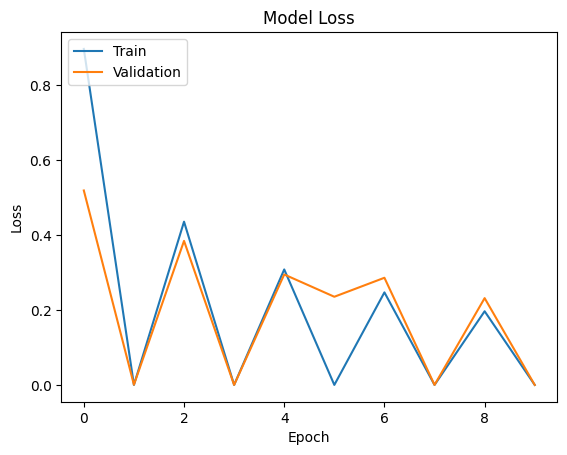

In [12]:
# Plot training & validation accuracy values across epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values across epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### Image Preprocessing and Prediction:

In [13]:

# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    # Load the image using Pillow
    img = Image.open(image_path)
    # Resize the image to match the input size of the model
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add a batch dimension (required for model.predict)
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize the image values to the range [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    # Preprocess the input image
    preprocessed_img = load_and_preprocess_image(image_path)
    # Make predictions on the preprocessed image
    predictions = model.predict(preprocessed_img)
    # Get the index of the class with the highest prediction score
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    # Convert the class index back to the class name
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name


### Class Mapping

In [14]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

class_indices


# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))
     


### Test 

In [15]:
# Example Usage: Predict the class of an image
image_path = r"C:\Users\pascal\Desktop\New Projects\plant-disease-prediction\plant-disease-prediction\plantvillage dataset\test_images\test_apple_black_rot.jpeg"
#image_path = r"C:\Users\pascal\Desktop\New Projects\plant-disease-prediction\plant-disease-prediction\plantvillage dataset\test_images\test_blueberry_healthy.jpg"
#image_path = r"C:\Users\pascal\Desktop\New Projects\plant-disease-prediction\plant-disease-prediction\plantvillage dataset\test_images\test_potato_early_blight.jpg"

# Predict the class of the image
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the predicted class name
print("Predicted Class Name:", predicted_class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Predicted Class Name: Apple___Black_rot


### Save the model  locally

In [17]:

# Save the model locally
model.save('plant_disease_prediction_model_V3.h5')
model.save('plant_disease_prediction_model_V3.keras')
